In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import optbinning as opt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer, LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [29]:
data=pd.read_csv("../data/application_train_vf.csv",parse_dates=["date_mensuelle"], index_col=0)

In [30]:
data["SK_ID_CURR"].value_counts().max()

1

In [31]:
data["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         276940
Revolving loans     29167
Name: count, dtype: int64

In [32]:
pd.DataFrame(data.isna().mean())

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.000039


In [33]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.923285
1    0.076715
Name: proportion, dtype: float64

#### Etudes des variables -- prédicteurs potentiels

In [34]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE  

In [35]:
pd.to_datetime(data["date_mensuelle"], format="%Y-%m-%d").dtypes

dtype('<M8[ns]')

In [36]:
data.nunique()

SK_ID_CURR                      306107
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2545
AMT_CREDIT                        5597
AMT_ANNUITY                      13667
AMT_GOODS_PRICE                   1000
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12571
DAYS_REGISTRATION                15687
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [37]:
def convert_numeric_to_category(df: pd.DataFrame):
    for colname in df.columns.tolist():
        if (df[colname].dtype=="number") & (df[colname].nunique() <=10):
            df[colname]=df[colname].astype("category")
            pass
        else:
            pass

In [38]:
data["NAME_HOUSING_TYPE"]=data["NAME_HOUSING_TYPE"].astype("category")

In [39]:
data["NAME_HOUSING_TYPE"].dtype

CategoricalDtype(categories=['Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents'], ordered=False, categories_dtype=object)

In [40]:
convert_numeric_to_category(data)

In [42]:
data["NAME_FAMILY_STATUS"]

0                Married
1                Married
2                Married
3              Separated
4         Civil marriage
               ...      
306102           Married
306103         Separated
306104           Married
306105    Civil marriage
306106           Married
Name: NAME_FAMILY_STATUS, Length: 306107, dtype: object

In [12]:
data["date_annee"]=data["date_mensuelle"].dt.year

In [23]:
categorical_vars=data.select_dtypes(include="category").columns.tolist()
categorical_vars

[]

In [14]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [15]:
def calculate_information_value_from_contingency_table(contingency_table):
    """
    Calculer l'Information Value à partir d'une table de contingence.
    
    Args:
        contingency_table (pd.DataFrame): La table de contingence entre la variable et la target.
        
    Returns:
        float: L'Information Value calculé.
    """
    non_event_rate=contingency_table.iloc[0]/(contingency_table.iloc[0]+contingency_table.iloc[1])
    event_rate=contingency_table.iloc[1]/(contingency_table.iloc[0]+contingency_table.iloc[1])
    iv=0
    if (non_event_rate.min() > 0) & (event_rate.mean() >0) :
        for col in non_event_rate.index:
            iv += (event_rate[col] - non_event_rate[col])*np.log(event_rate[col] / non_event_rate[col])

    return iv

In [16]:
for col in categorical_vars:
    contingency_table = pd.crosstab(data["TARGET"], data[col])
    v_cramer = cramers_v(contingency_table)
    iv=calculate_information_value_from_contingency_table(contingency_table)
    print(f"{col} Cramer's V with target : {v_cramer}")
    print(f"{col} Information Value target : {iv}")
    print(60*"-")



In [22]:
categorical_vars

[]

In [17]:
data["FLAG_EMP_PHONE"].value_counts()

FLAG_EMP_PHONE
1    250889
0     55218
Name: count, dtype: int64

In [18]:
def show_risk_stability_overtime(colname:str):
    result = data.groupby([colname, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(f"{colname}"), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname} et année")

    # Ajouter une légende
    plt.legend(title=f"{colname}")

    # Afficher le graphique
    plt.show()
    

In [19]:
for colname in categorical_vars:
    result = data.groupby([colname, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(f"{colname}"), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname} et année")

    # Ajouter une légende
    plt.legend(title=f"{colname}")

    # Afficher le graphique
    plt.show()

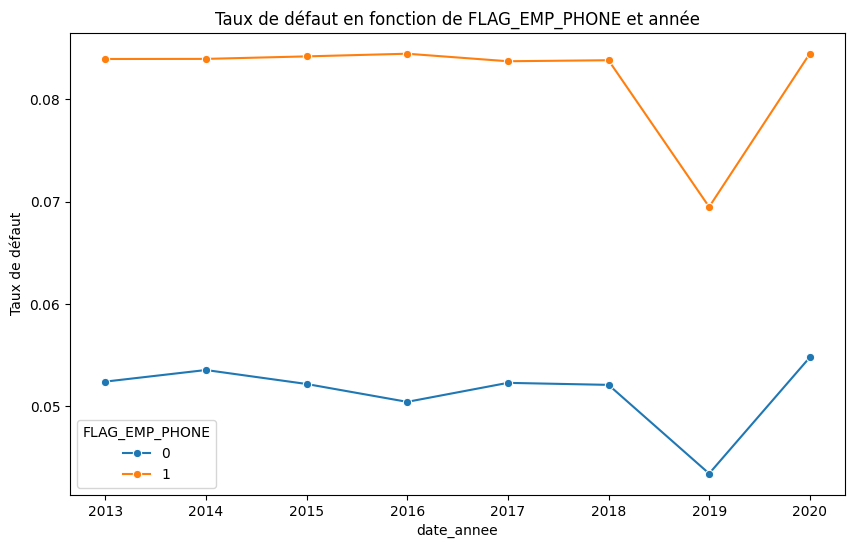

In [20]:
show_risk_stability_overtime("FLAG_EMP_PHONE") # à faire une boucle sur les variables catégorielles